In [1]:
%cd '/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection'

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


/Users/jlq293/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofCopenhagen/UCPH_CORS - Documents/Research [PhD projects, MSc projects etc.]/PhD project - Lukas - Efficacy-effectiveness gab/02 Project/Study 1/Study1-Div/DrugSelection


# read in data


### MEPS


In [2]:
# MEPS
meps_df = pd.read_csv(
    "02_AllThingsData/US-MEPS/Data/MEPS_DataForPlotting.csv", index_col=0
)

scaler = StandardScaler()
meps_df["Standardized_DrugUse"] = scaler.fit_transform(meps_df[["Measure Values"]])
meps_df.head(2)

,Year,Group by,Group Level,Measure Values,Class,Color,Standardized_DrugUse
0,1996,Prescribed drug,amitriptyline,3150.0,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",0.024025
1,1996,Prescribed drug,bupropion,NaN,Other antidepressants,"(0.7026528258362169, 0.7008073817762399, 0.839...",NaN


### MedStat


In [3]:
# MedStat
medstat_df = pd.read_csv(
    "02_AllThingsData/DK-MedStat/Data/MedStat_Long_Plotting.csv", index_col=0
)

# remove parent_class
medstat_df = medstat_df[medstat_df["Class"] != "parent class"]

scaler = StandardScaler()
medstat_df["Standardized_DrugUse"] = scaler.fit_transform(medstat_df[["DrugUse"]])
medstat_df.head(2)

,Class,Color,Drug,Year,DrugUse,Standardized_DrugUse
2,Non-selective monoamine reuptake inhibitors,"(0.8978854286812764, 0.939038831218762, 0.9773...",imipramine,1996,NaN,NaN
3,Non-selective monoamine reuptake inhibitors,"(0.8643137254901961, 0.9173856209150326, 0.966...",imipramine oxide,1996,NaN,NaN


# merging


In [4]:
meps_df["Drug"] = meps_df["Group Level"]
meps_drugs = meps_df["Drug"].unique()
print(len(meps_drugs))

medstat_drugs = medstat_df["Drug"].unique()
print(len(medstat_drugs))

12
31


In [5]:
# get union of medstat_drugs and meps_drugs
union_drugs = list(set(meps_drugs) | set(medstat_drugs))
print(len(union_drugs))

# the drugs that are in medstat but not in meps
medstat_not_meps = list(set(medstat_drugs) - set(meps_drugs))
print(len(medstat_not_meps))

# the drugs that are in meps but not in medstat
meps_not_medstat = list(set(meps_drugs) - set(medstat_drugs))
print(len(meps_not_medstat))

32
20
1


In [6]:
merged_df = pd.merge(
    meps_df, medstat_df, on=["Drug", "Year"], how="left", suffixes=("_meps", "_medstat")
)

merged_df = merged_df.drop(
    [
        "Group by",
        "Group Level",
        "Measure Values",
        "Class_meps",
        "Color_meps",
        "DrugUse",
    ],
    axis=1,
)
merged_df["Drug"].unique()

array(['amitriptyline', 'bupropion', 'citalopram', 'duloxetine',
       'escitalopram', 'fluoxetine', 'mirtazapine', 'nortriptyline',
       'paroxetine', 'sertraline', 'trazodone', 'venlafaxine'],
      dtype=object)

# Plotting


In [7]:
merged_df = merged_df[merged_df["Drug"] != "trazodone"]
merged_df.sort_values(by=["Class_medstat", "Drug", "Year"], inplace=True)

merged_df

,Year,Standardized_DrugUse_meps,Drug,Class_medstat,Color_medstat,Standardized_DrugUse_medstat
0,1996,0.024025,amitriptyline,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",NaN
12,1997,-0.214583,amitriptyline,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",-0.196563
24,1998,-0.090229,amitriptyline,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",-0.203109
36,1999,-0.320631,amitriptyline,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",-0.209386
48,2000,-0.420998,amitriptyline,Non-selective monoamine reuptake inhibitors,"(0.5670588235294118, 0.7633064206074587, 0.871...",-0.210194
...,...,...,...,...,...,...
249,2016,2.459343,sertraline,Selective serotonin reuptake inhibitors,"(0.45176470588235296, 0.7670895809304115, 0.46...",3.046267
261,2017,2.493430,sertraline,Selective serotonin reuptake inhibitors,"(0.45176470588235296, 0.7670895809304115, 0.46...",3.443606
273,2018,2.788218,sertraline,Selective serotonin reuptake inhibitors,"(0.45176470588235296, 0.7670895809304115, 0.46...",3.913132
285,2019,2.910678,sertraline,Selective serotonin reuptake inhibitors,"(0.45176470588235296, 0.7670895809304115, 0.46...",4.396468


/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_42892/1745245902.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


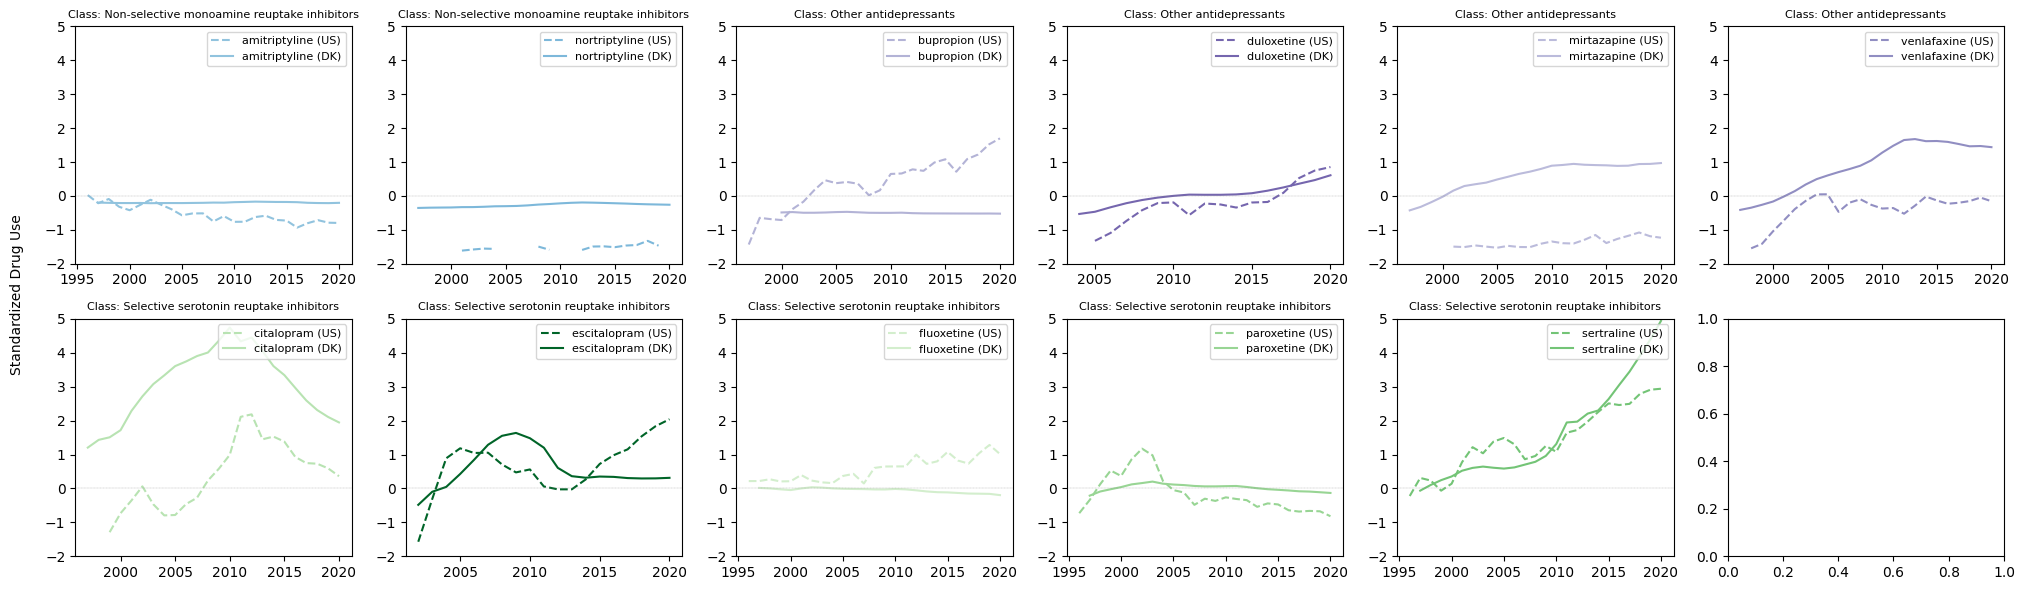

In [8]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import ast
import numpy as np
from pyparsing import line

num_drugs = len(merged_df["Drug"].unique())
num_rows = 2
num_columns = int(np.ceil(num_drugs / num_rows))
fig, axes = plt.subplots(
    num_rows, num_columns, figsize=(20, 6), constrained_layout=True
)

for i, drug in enumerate(merged_df["Drug"].unique()):
    row = i // num_columns
    col = i % num_columns

    drug_data = merged_df[merged_df["Drug"] == drug]
    # class
    drug_class = drug_data["Class_medstat"].values[0]
    color = ast.literal_eval(drug_data["Color_medstat"].values[0])

    if num_rows == 1 or num_columns == 1:
        ax = axes[
            max(row, col)
        ]  # handle the case where there is only one row or one column of subplots
    else:
        ax = axes[row, col]

    (line_us,) = ax.plot(
        drug_data["Year"],
        drug_data["Standardized_DrugUse_meps"],
        color=color,
        linestyle="dashed",
    )
    (line_dk,) = ax.plot(
        drug_data["Year"], drug_data["Standardized_DrugUse_medstat"], color=color
    )

    # add a line at 0 on y
    ax.axhline(y=0, color="grey", linestyle="dashed", linewidth=0.2)

    ax.set_title(f"Class: {drug_class}", fontsize=8)
    ax.set_ylim([-2, 5])

    # Creating custom legend for each line
    legend_us = mlines.Line2D(
        [], [], color=color, linestyle="dashed", label=f"{drug} (US)"
    )
    legend_dk = mlines.Line2D([], [], color=color, label=f"{drug} (DK)")

    # Adding legend to each subplot
    ax.legend(handles=[legend_us, legend_dk], loc="upper right", fontsize=8)

fig.text(-0.01, 0.5, "Standardized Drug Use", va="center", rotation="vertical")

plt.tight_layout()


plt.savefig("02_AllThingsData/Combined/DrugUse/imgs/CombinedUsePlot.png", dpi=300)

plt.show()

/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_42892/3725858984.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


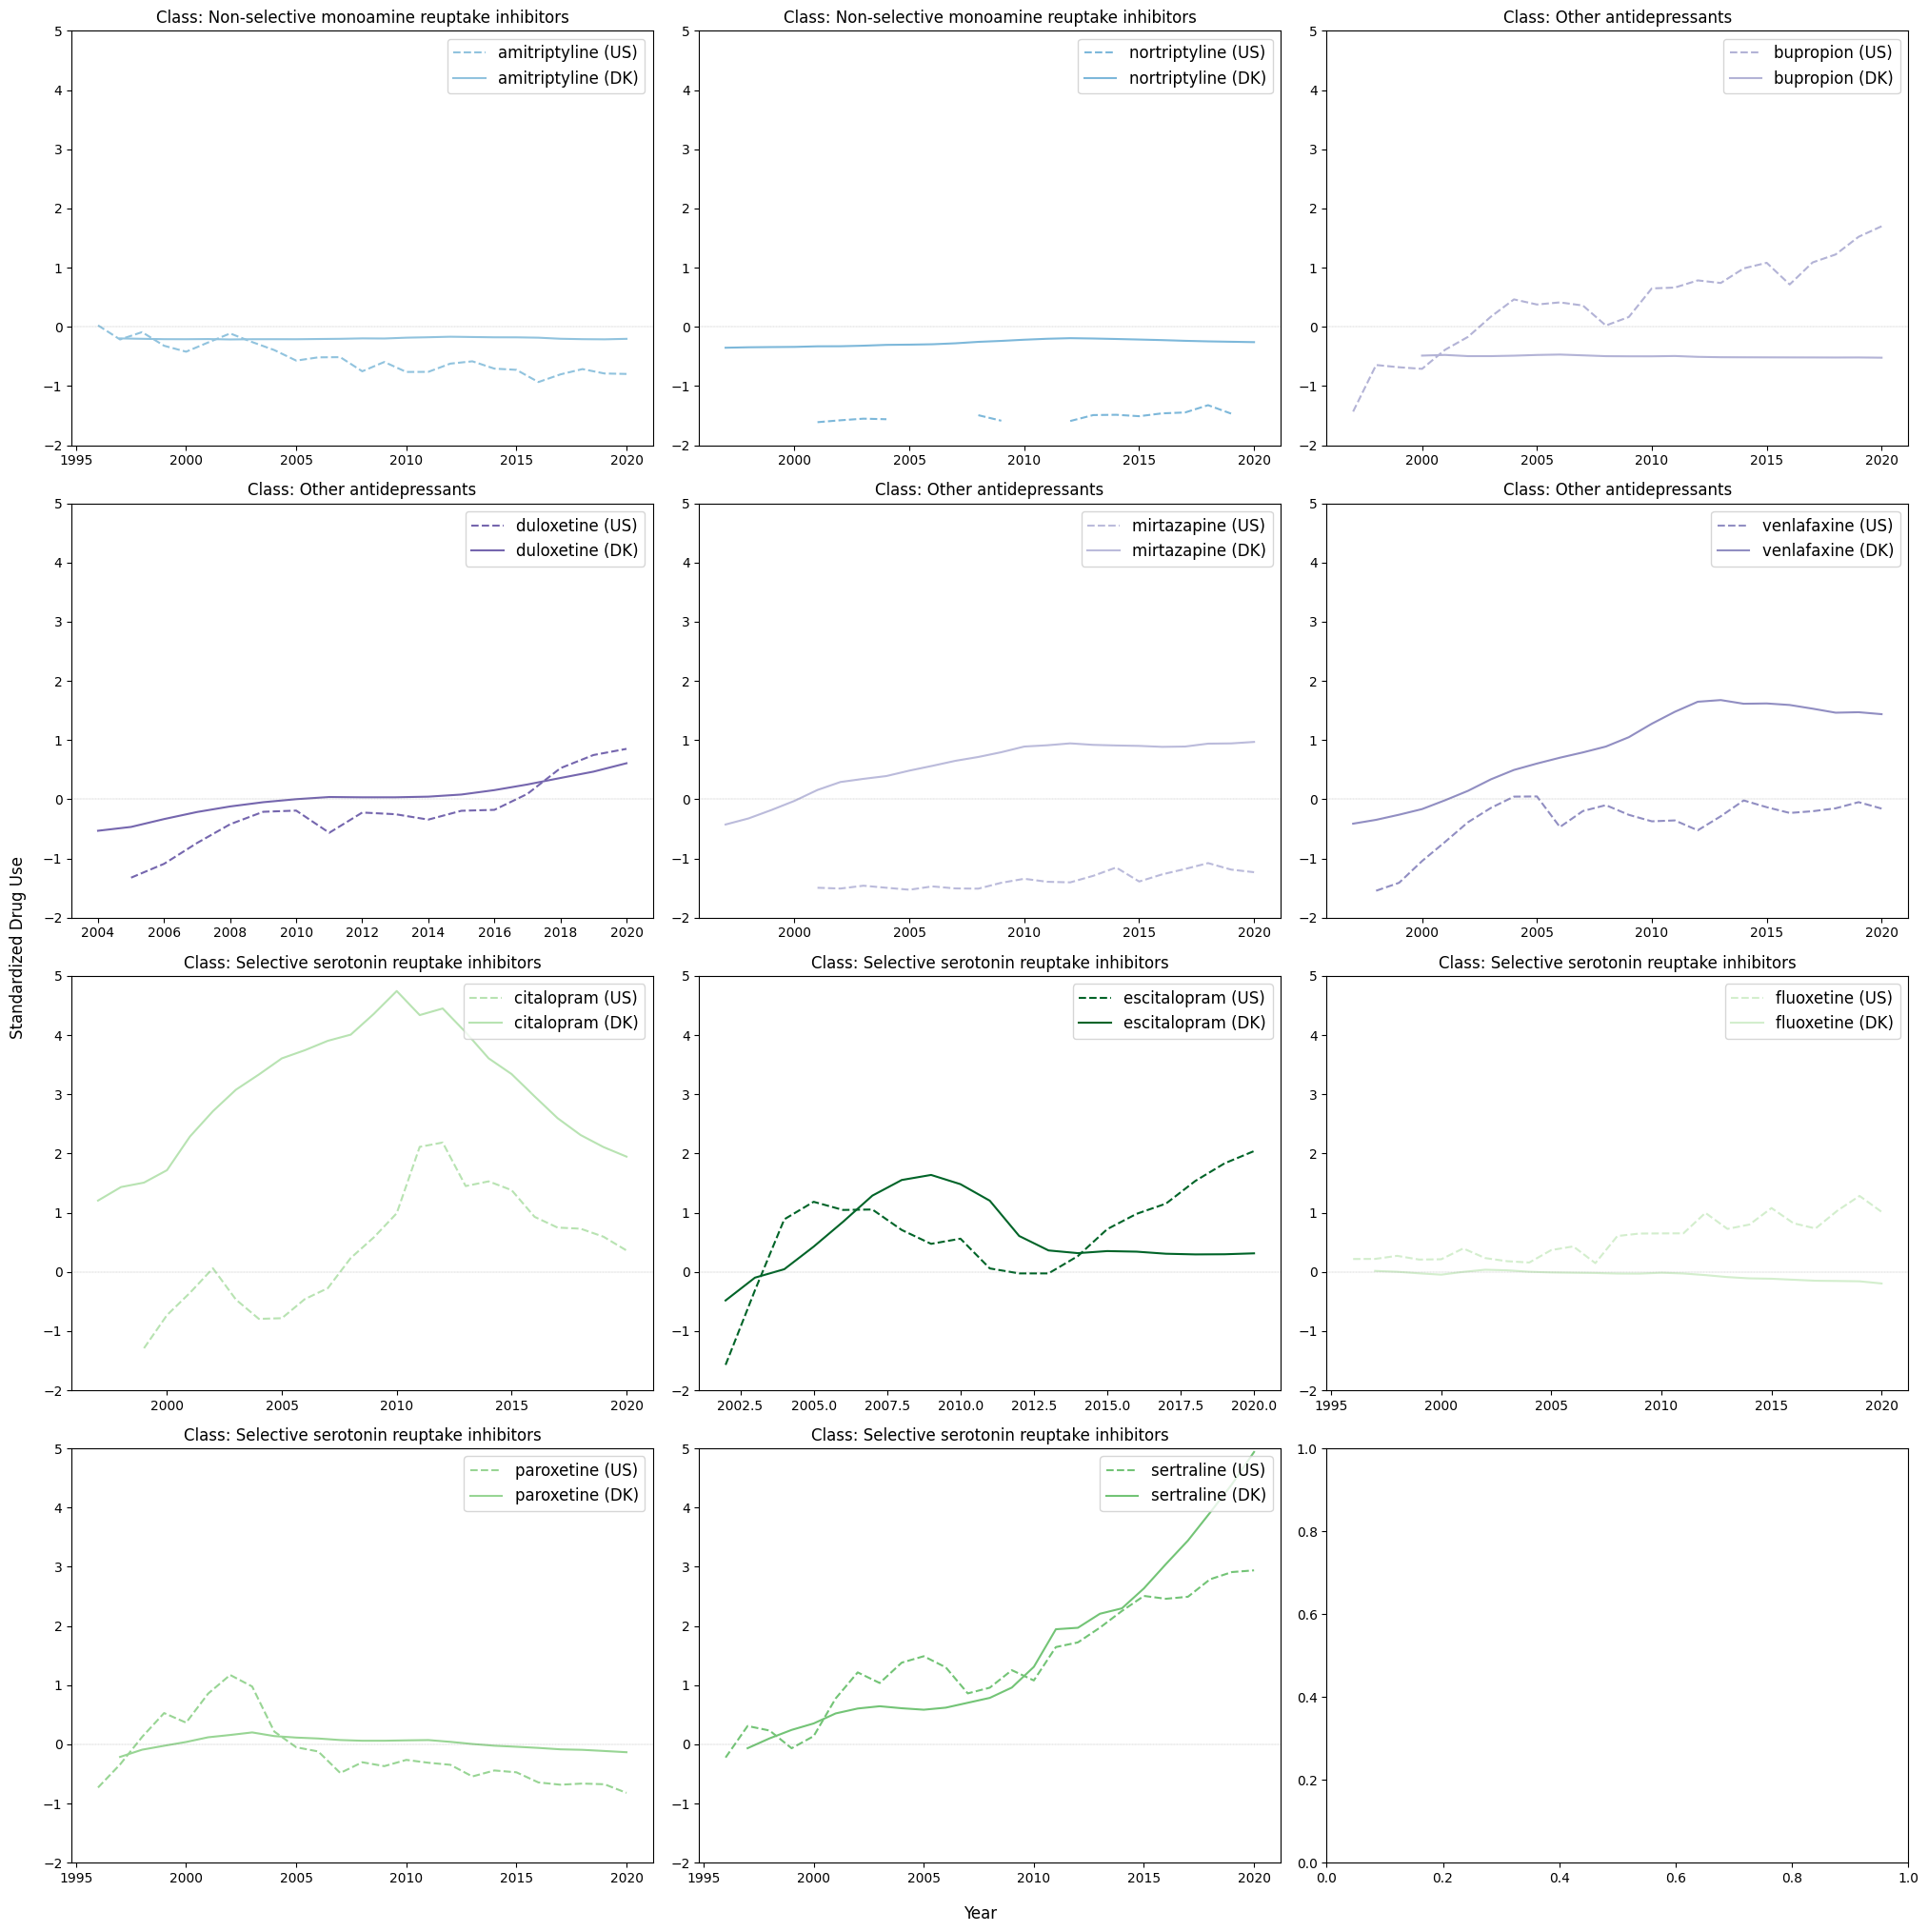

In [17]:
from tkinter import font
from matplotlib.font_manager import font_scalings
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import ast
import numpy as np

num_drugs = len(merged_df["Drug"].unique())
num_columns = 3
num_rows = int(np.ceil(num_drugs / num_columns))
fig, axes = plt.subplots(
    num_rows, num_columns, figsize=(20, 5 * num_rows), constrained_layout=True
)

for i, drug in enumerate(merged_df["Drug"].unique()):
    row = i // num_columns
    col = i % num_columns

    drug_data = merged_df[merged_df["Drug"] == drug]
    drug_class = drug_data["Class_medstat"].values[0]
    color = ast.literal_eval(drug_data["Color_medstat"].values[0])

    # For the case where there are an odd number of subplots, this logic ensures we index correctly
    if num_rows == 1:
        ax = axes[col]
    elif num_columns == 1:
        ax = axes[row]
    else:
        ax = axes[row, col]

    (line_us,) = ax.plot(
        drug_data["Year"],
        drug_data["Standardized_DrugUse_meps"],
        color=color,
        linestyle="dashed",
    )
    (line_dk,) = ax.plot(
        drug_data["Year"], drug_data["Standardized_DrugUse_medstat"], color=color
    )
    ax.axhline(y=0, color="grey", linestyle="dashed", linewidth=0.2)
    ax.set_title(f"Class: {drug_class}", fontsize=12)
    ax.set_ylim([-2, 5])

    legend_us = mlines.Line2D(
        [], [], color=color, linestyle="dashed", label=f"{drug} (US)"
    )
    legend_dk = mlines.Line2D([], [], color=color, label=f"{drug} (DK)")
    ax.legend(handles=[legend_us, legend_dk], loc="upper right", fontsize=12)

fig.text(0.5, -0.01, "Year", ha="center", fontsize=12)
fig.text(
    -0.01, 0.5, "Standardized Drug Use", va="center", rotation="vertical", fontsize=12
)

plt.tight_layout()
plt.savefig(
    "01_ParagraphWriting/Quarto/images/MEPS_MEDSTAT_CombinedUsePlot.png", dpi=300
)

plt.show()

Suggestions:
SSRIS:

- Sertraline (Prevalence; Rise in prevalence)
- Fluoxetine (First SSRI - Prozac)
- Citalopram (First SSRI)
- Escitalopram

SNRIS:

- Venlafaxine (High DK use; Low US use)
- Duloxetine (High DK use; Low US use)

atypical antidepressant:

- Bupropion (High US use; Low DK use)

primarily used to treat major depressive disorder and to support smoking cessation.[15][16] It is also popular as an add-on medication in the cases of "incomplete response" to the first-line selective serotonin reuptake inhibitor (SSRI) antidepressant


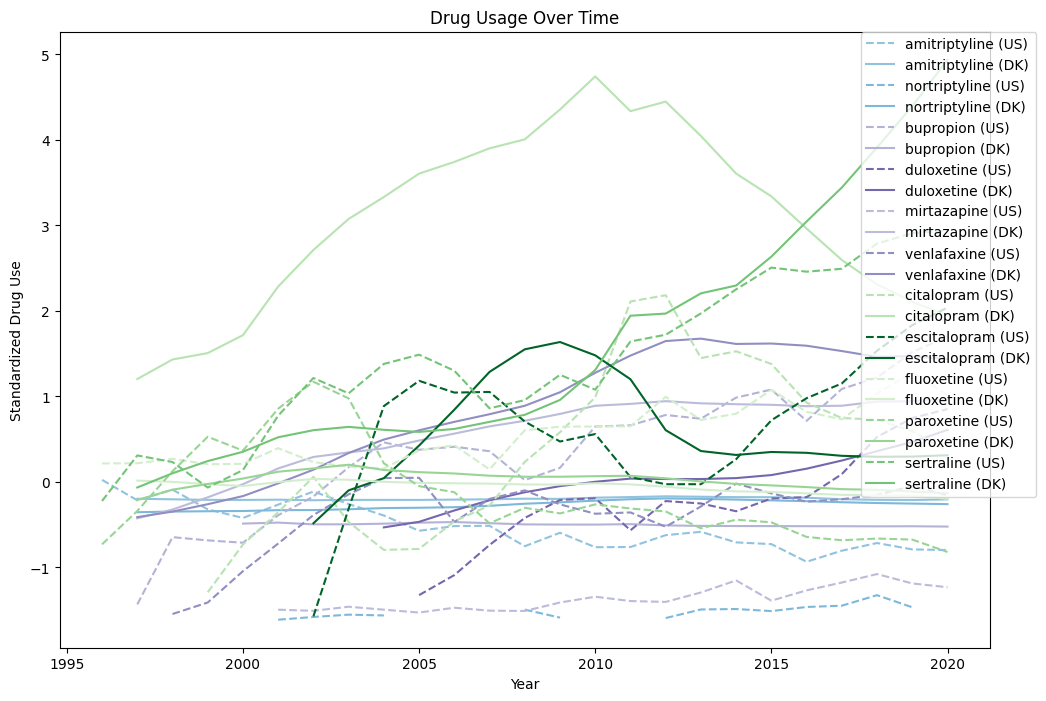

In [9]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import ast

fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size as necessary

handles = []  # list to store custom legend handles

# Adjust line colors and styles for each drug
for drug in merged_df["Drug"].unique():
    drug_data = merged_df[merged_df["Drug"] == drug]
    color = ast.literal_eval(
        drug_data["Color_medstat"].values[-1]
    )  # Assuming color information is correct and safe
    (line_us,) = ax.plot(
        drug_data["Year"],
        drug_data["Standardized_DrugUse_meps"],
        label=f"{drug} (US)",
        color=color,
        linestyle="dashed",
    )
    (line_dk,) = ax.plot(
        drug_data["Year"],
        drug_data["Standardized_DrugUse_medstat"],
        label=f"{drug} (DK)",
        color=color,
    )
    handles.append(
        mlines.Line2D([], [], color=color, linestyle="dashed", label=f"{drug} (US)")
    )
    handles.append(mlines.Line2D([], [], color=color, label=f"{drug} (DK)"))

ax.set_title("Drug Usage Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Standardized Drug Use")

# Adding legend to the plot with custom handles
ax.legend(
    handles=handles, loc="upper right", bbox_to_anchor=(1.05, 1), borderaxespad=0.0
)

plt.show()